### In this  project for Codecademy final portfolio project i chose netflix stock price data as my data set,  the link for the website that i accuired this data set from is this: https://www.kaggle.com/datasets/henryshan/netflix-stock-price.


## Installing the necessary libraries. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

The dataset contains the following columns:

Date: The date of the trading session.
Open: The price at which the stock opened.
High: The highest price of the stock during the trading session.
Low: The lowest price of the stock during the trading session.
Close: The closing price of the stock.
Adj Close: The adjusted closing price, which accounts for any corporate actions such as stock splits.
Volume: The number of shares that were traded during the session.session.

### Loading and exploring the data 

In [2]:
data = pd.read_csv('NFLX.csv')

In [3]:
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.shape

(5422, 7)

In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Statistical Overview

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5.422000e+03
mean,131.304057,133.340057,129.201970,131.322955,131.322955,1.594455e+07
std,172.967612,175.451082,170.335958,172.929156,172.929156,1.874197e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.107500,4.183214,4.031786,4.112857,4.112857,5.960725e+06
50%,33.700714,34.275714,33.237858,33.833570,33.833570,1.006250e+07
75%,244.832497,250.257496,237.687497,245.152500,245.152500,1.886930e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


The statistical overview of the dataset provides the following insights:

Count: There are 5,422 entries, indicating daily data over a long period.

Mean: Std (Standard Deviation): These provide an understanding of the average values and variability of the stock prices and volume. The high standard deviation in prices suggests significant volatility over time.

Min, Max: The minimum and maximum values for each column. For example, the lowest closing price was about $0.37, and the highest was around $691.69, indicating a substantial growth over time.

25%, 50% (Median), 75%: These percentiles give an idea about the distribution of the data. For instance, the median closing price is about $33.83, much lower than the mean, indicating a skewed distribution.

## Trends Overtime analysis and visualization

In [8]:
# Converting the date table to the date time format
data['Date'] = pd.to_datetime(data['Date'])


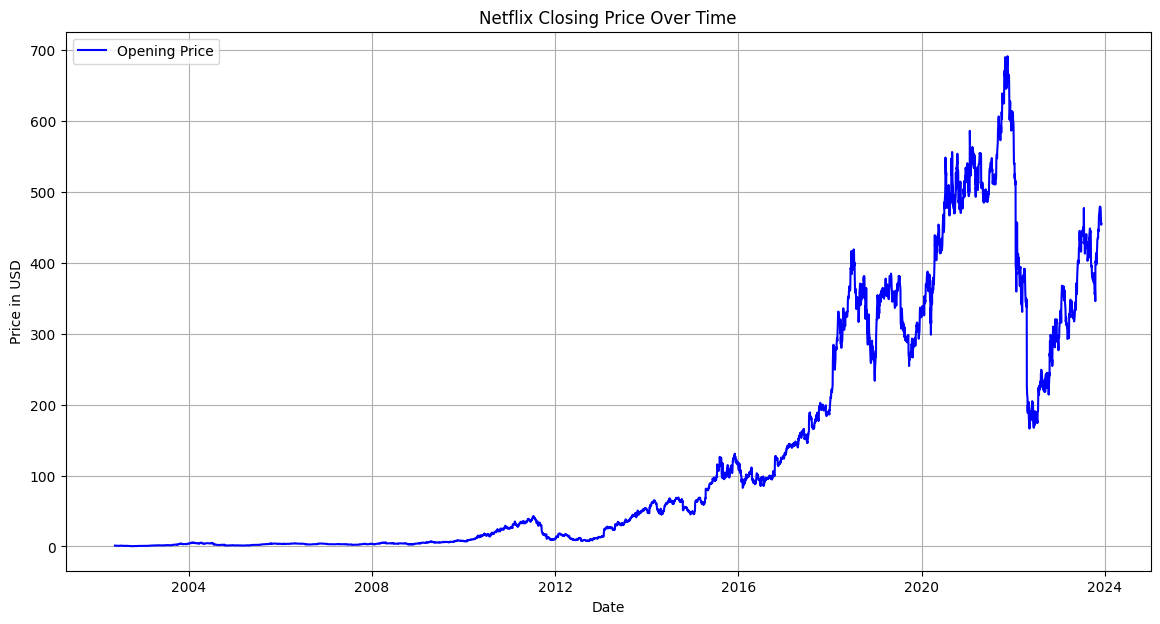

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Opening Price', color='blue')
plt.title('Netflix Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


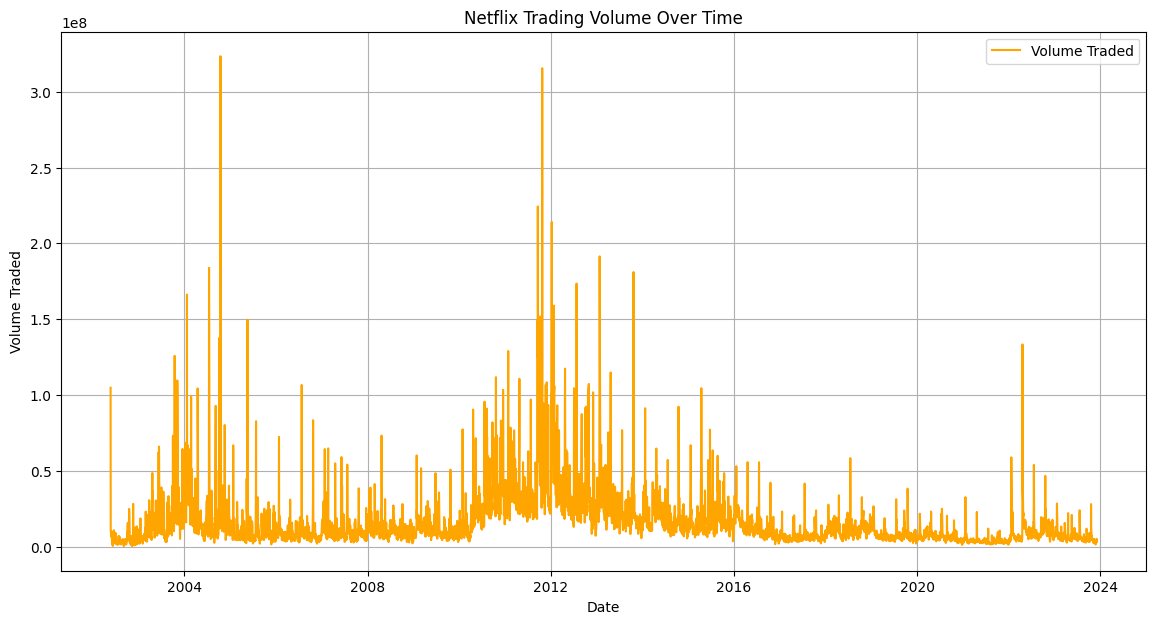

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'], label='Volume Traded', color='orange')
plt.title('Netflix Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.grid(True)
plt.show()

The visualizations provide a clear view of Netflix's stock performance over time:

Closing Price Trend:

The graph shows a significant upward trend in Netflix's stock price, especially notable after around 2013.
There are periods of volatility, as indicated by the sharp rises and falls in the stock price at various points.
Trading Volume Trend:

The trading volume has varied significantly over time, with some spikes indicating periods of high trading activity.
It's interesting to note that some of these spikes in volume coincide with significant changes in the stock price, which is typical as price movements often attract more trading.

## Moving averages, Seasonal analysis, Correlation analysis 

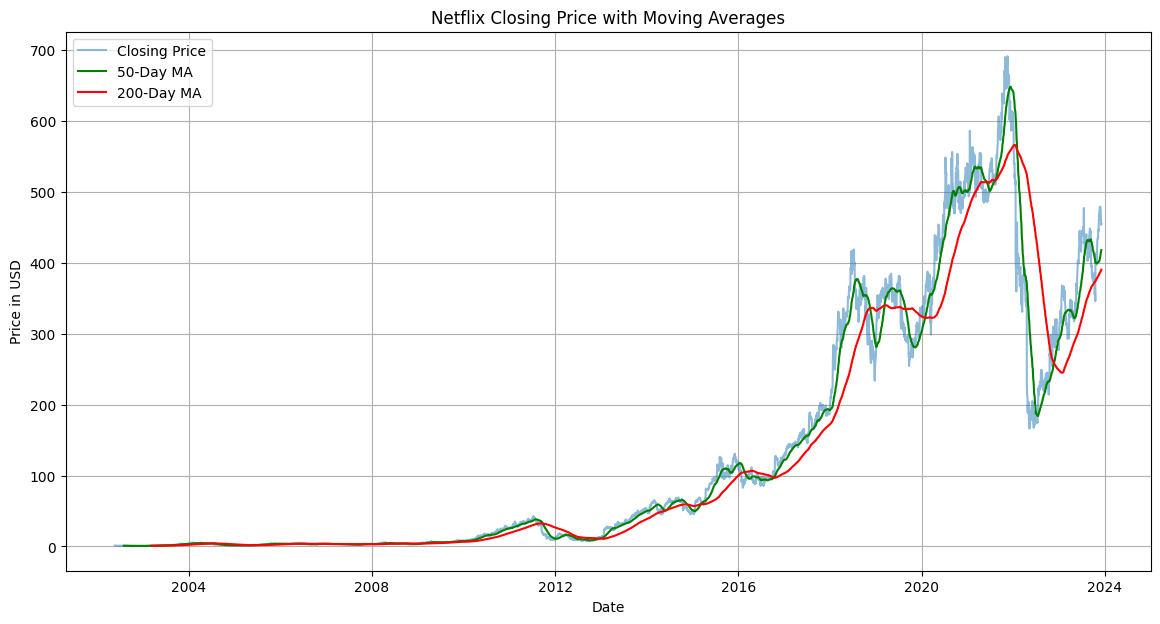

In [11]:
# moving average calculations:
# we will create new columns for two moving averages, 50 day moving average and 200 day moving average
data['50_day_MA'] = data['Close'].rolling(window=50).mean()
data['200_day_MA'] = data['Close'].rolling(window=200).mean()

# Plotting the Closing Price with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price', alpha=0.5)
plt.plot(data['Date'], data['50_day_MA'], label='50-Day MA', color='green')
plt.plot(data['Date'], data['200_day_MA'], label='200-Day MA', color='red')
plt.title('Netflix Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#Seasonal Analysis - plotting monthly average closing prices for each year
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
seasonal_data = data.groupby(['Year', 'Month']).mean()['Close'].unstack()

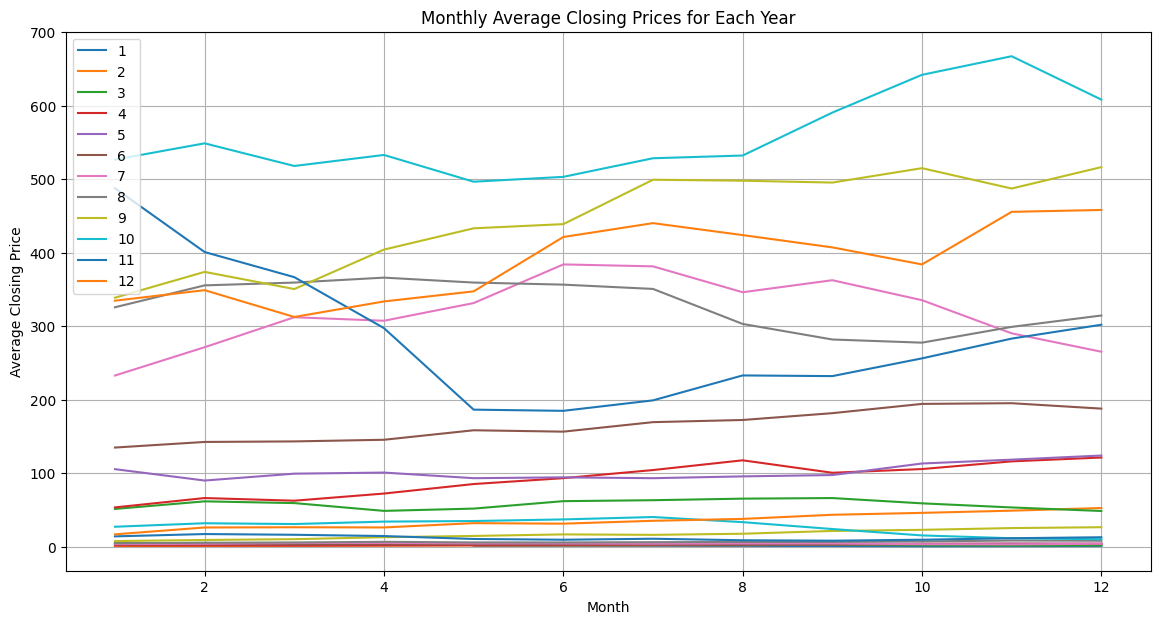

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(seasonal_data.T)
plt.title('Monthly Average Closing Prices for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend(seasonal_data.columns)
plt.grid(True)
plt.show()


In [14]:
# Calculating the correlation 
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
correlation_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.999849,0.999851,0.999676,-0.283891
High,0.999849,1.000000,0.999809,0.999856,-0.282562
Low,0.999851,0.999809,1.000000,0.999847,-0.285313
Close,0.999676,0.999856,0.999847,1.000000,-0.283770
Volume,-0.283891,-0.282562,-0.285313,-0.283770,1.000000


The analyses provide the following insights:

Moving Averages:

The 50-day and 200-day moving averages (MAs) smooth out the daily price fluctuations, providing a clearer view of the long-term trend.
The 50-day MA (green line) is more sensitive to recent price movements, while the 200-day MA (red line) shows a more long-term trend.
Crossovers between these MAs can indicate significant trend changes. For instance, when the 50-day MA crosses above the 200-day MA, it's often considered a bullish signal, and vice versa.
Seasonal Analysis:

The plot of monthly average closing prices for each year indicates some seasonal patterns. There are fluctuations within years, but these patterns do not appear consistent across years.
Certain months in some years show higher average prices, but this doesn't seem to be a regular occurrence every year, suggesting that the stock's performance might be influenced more by other factors than seasonality.
Correlation Analysis:

The high correlations (close to 1) among the Open, High, Low, and Close prices are expected as these metrics are inherently related to each other.
The correlation between the Volume and price metrics (Open, High, Low, Close) is negative but weak (around -0.28). This suggests that higher trading volumes do not consistently correlate with higher or lower prices.

## Volatility analysis:

In [15]:
data['Daily_Returns'] = data['Adj Close'].pct_change()
daily_volatility = data['Daily_Returns'].std()
annual_volatility = daily_volatility * np.sqrt(252)
print(annual_volatility)

0.5643499943769346


A value of 0.5643 means that the stock price is expected to fluctuate by about 56.43% over a year, under normal market conditions.
It's important to note that this is a historical measure. While it provides insights into past price movements, it doesn't necessarily predict future volatility.
Higher volatility generally indicates a higher risk and potentially higher returns, as the stock price can change significantly in a short period.

## Return analysis:

In [16]:
return_stats = data['Daily_Returns'].describe()
return_stats

count    5421.000000
mean        0.001735
std         0.035551
min        -0.409065
25%        -0.014356
50%         0.000337
75%         0.016902
max         0.422235
Name: Daily_Returns, dtype: float64

Count: There are 5,421 daily return observations.
Mean (Average Return): The average daily return is approximately 0.1735%. This is a relatively small average daily change.

Standard Deviation: A standard deviation of 3.5551% indicates the typical amount that returns deviate from the average. This is a measure of volatility; a higher value indicates more volatility in daily returns.

Min and Max: The minimum and maximum returns show quite a range, from -40.91% to 42.22%. These extreme values indicate days with very large price movements.

25th, 50th (Median), and 75th Percentiles: The median close to zero suggests that half of the days had a return near zero. The 25th and 75th percentiles show the spread of the data.

## Distribtion analysis 

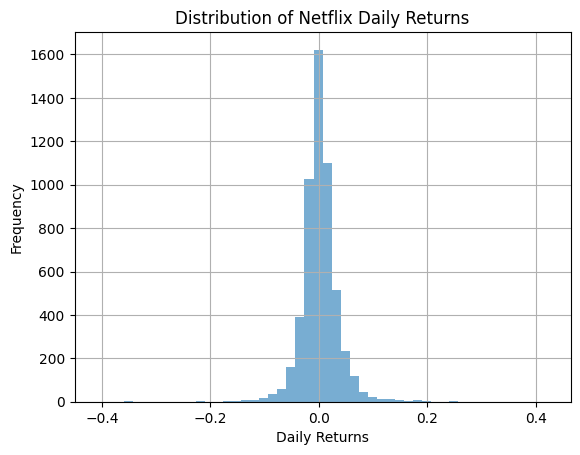

In [17]:
plt.hist(data['Daily_Returns'].dropna(), bins=50, alpha=0.6)
plt.title('Distribution of Netflix Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Regression Model for Predicting Future Stock Prices:

In [18]:
 # for the machine learning models we will add lagged prices for this data set
data['Lag_1'] = data['Close'].shift(1)
data['Lag_5'] = data['Close'].shift(5)

In [19]:
# Prepare the data
X = data[['Lag_1', 'Lag_5', '50_day_MA', '200_day_MA', 'Volume', 'High', 'Low', 'Open']] 
y = data['Close']

# Handling NaN values (dropping or imputation)
X = X.dropna()
y = y[X.index]  # Align y with X after dropping NaNs

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Print the feature importances
feature_names = X.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for feature in feature_importances:
    print(f"{feature[0]}: {feature[1]}")

Low: 0.660374656308047
High: 0.24378419914538846
Open: 0.04350339015492999
Lag_1: 0.032640952855207385
200_day_MA: 0.00967003192560351
50_day_MA: 0.00917689790848142
Lag_5: 0.0008294150683766026
Volume: 2.0456633965609462e-05


'Low' (66.04%): The low price of the day is the most important feature. This suggests that the day's low price is highly indicative of the closing price.

'High' (24.38%): The high price of the day is the second most important feature, also suggesting a strong relationship with the closing price.

'Open' (4.35%): The opening price has a moderate impact on the model, indicating it has some but less predictive power compared to the high and low prices.

'Lag_1' (3.26%): The previous day's closing price is somewhat important, which aligns with the idea that past prices can influence future prices.

'200_day_MA' (0.97%) and '50_day_MA' (0.92%): Both moving averages have a similar and relatively low importance, suggesting that they don't have as much predictive power in this model as the actual price points.

'Lag_5' (0.08%): The closing price 5 days ago has very little importance in this model.

'Volume' (0.002%): Interestingly, the trading volume has the least importance among the features, indicating it doesn't significantly influence the closing price in this model.

In [20]:
# Feature selection
features = ['Low', 'High', 'Open', 'Lag_1']  
X = data[features]
y = data['Close']

# Handling NaN values (if any)
X = X.dropna()
y = y.loc[X.index]  # Align y with X after dropping NaNs

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Creating the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 2.8827289743478803
Mean Squared Error (MSE): 15.366251283398604
Root Mean Squared Error (RMSE): 3.9199810309998444
R-squared: 0.9989597286268722


Mean Absolute Error (MAE) ~ 2.88: On average, the model's predictions are about 2.88 units (dollars, if your target is stock price) away from the actual values. This is a relatively straightforward metric to understand and gives a good sense of the average error magnitude.

Mean Squared Error (MSE) ~ 15.37: The MSE is considerably higher than the MAE due to its squaring of the errors, which gives more weight to larger errors. This suggests that there might be some instances where the model is making quite significant errors.

Root Mean Squared Error (RMSE) ~ 3.92: This is the square root of MSE and is in the same units as your target variable. It indicates that the typical error (standard deviation of the residual errors) is about 3.92 units. RMSE is more sensitive to outliers than MAE.

R-squared ~ 0.999: This is a very high R-squared value, indicating that your model explains almost all of the variance in the target variable. An R-squared this high is quite rare in real-world scenarios and might indicate that the model is capturing the underlying pattern very well. However, in financial time series predictions, it might also be a sign to carefully check for any data leakage or overfitting.

The MAE and RMSE values give a sense of the average error magnitude. In the context of stock prices, whether an average error of about 2.88 to 3.92 units is acceptable depends on the price scale of the stock and the specific requirements of our application.

The very high R-squared value indicates that the model is capturing the variance in the stock price extremely well, which might be unusual for stock price predictions due to their inherent unpredictability and noise.


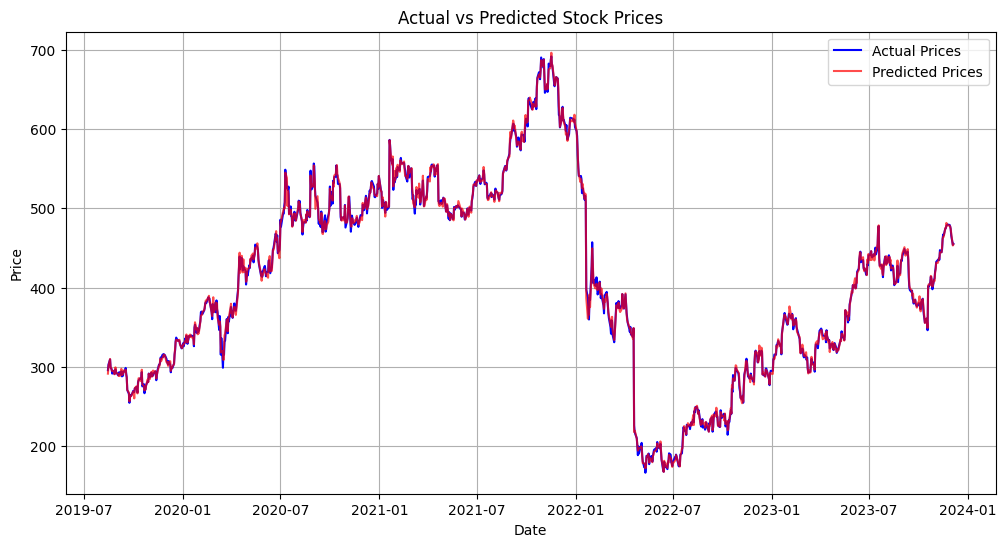

In [21]:
dates = data['Date'].loc[y_test.index]
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices', color='red', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
